<a href="https://colab.research.google.com/github/immy78/Deep_Learning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
classes_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
x_train.max(),x_train.min()

(255, 0)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

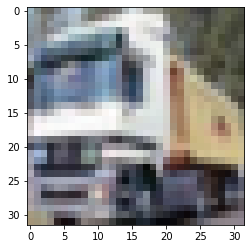

In [ ]:
plt.imshow(x_train[1])

In [ ]:
y_train[1]

array([9], dtype=uint8)

**Build a CNN Model**

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
 history = model.fit(x_train,y_train,batch_size=10,epochs=5,verbose=1,validation_data=(x_test,y_test))

Epoch 1/5
5000/5000 [==============================] - 162s 32ms/step - loss: 1.3617 - sparse_categorical_accuracy: 0.5141 - val_loss: 1.0872 - val_sparse_categorical_accuracy: 0.6206
Epoch 2/5
5000/5000 [==============================] - 160s 32ms/step - loss: 1.0627 - sparse_categorical_accuracy: 0.6225 - val_loss: 0.9549 - val_sparse_categorical_accuracy: 0.6639
Epoch 3/5
5000/5000 [==============================] - 161s 32ms/step - loss: 0.9484 - sparse_categorical_accuracy: 0.6628 - val_loss: 0.9788 - val_sparse_categorical_accuracy: 0.6588
Epoch 4/5
5000/5000 [==============================] - 161s 32ms/step - loss: 0.8658 - sparse_categorical_accuracy: 0.6934 - val_loss: 0.9482 - val_sparse_categorical_accuracy: 0.6644
Epoch 5/5
5000/5000 [==============================] - 162s 32ms/step - loss: 0.7977 - sparse_categorical_accuracy: 0.7181 - val_loss: 0.9340 - val_sparse_categorical_accuracy: 0.6714


In [ ]:
history.history

{'loss': [1.3617103099822998,
  1.0627106428146362,
  0.9483976364135742,
  0.8657640814781189,
  0.7977277636528015],
 'sparse_categorical_accuracy': [0.5141199827194214,
  0.6225399971008301,
  0.6627799868583679,
  0.6933599710464478,
  0.7181199789047241],
 'val_loss': [1.0872234106063843,
  0.954903781414032,
  0.9788134694099426,
  0.9481915235519409,
  0.9339624047279358],
 'val_sparse_categorical_accuracy': [0.6205999851226807,
  0.6639000177383423,
  0.6588000059127808,
  0.6643999814987183,
  0.6714000105857849]}

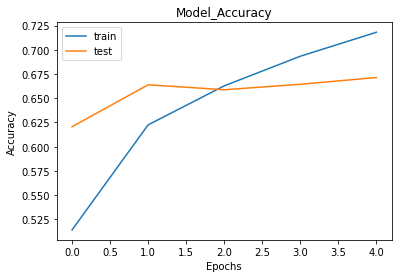

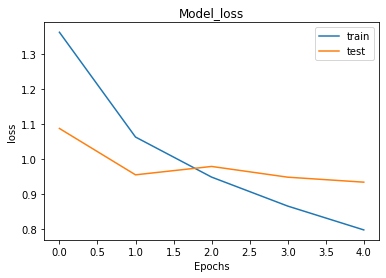

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[789,  22,  39,  21,   1,   8,   5,   8,  72,  35],
       [ 22, 844,   7,  11,   1,   6,   3,   1,  25,  80],
       [ 97,  11, 550,  76,  45, 106,  43,  39,  21,  12],
       [ 36,  17,  73, 530,  21, 200,  44,  40,  21,  18],
       [ 49,   5, 140, 124, 447,  69,  44,  98,  18,   6],
       [ 17,   5,  69, 174,  23, 638,  16,  37,  11,  10],
       [ 17,  15,  51, 112,  33,  55, 685,  10,  13,   9],
       [ 21,   7,  49,  45,  26,  72,   0, 761,   7,  12],
       [119,  50,  12,   7,   0,   7,   3,   4, 763,  35],
       [ 43, 158,   8,  21,   3,   4,   4,  19,  33, 707]])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9b1ed315c0>)

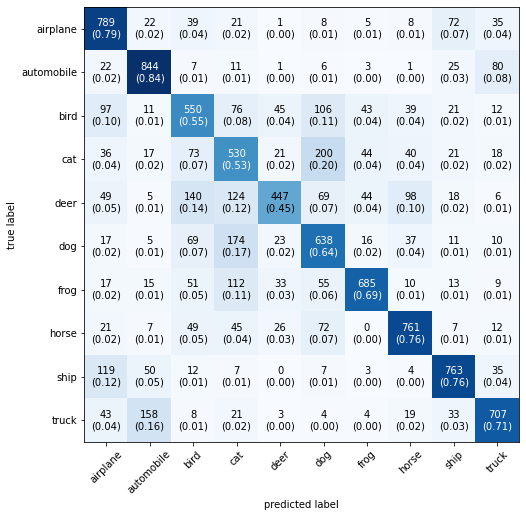

In [ ]:
plot_confusion_matrix(mat,figsize=(8,8),show_normed=True,class_names=classes_name)

In [ ]:
pip install mlxtend --upgrade

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.17.3)
